# Assignment 4

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [204]:
student = {
    'name' : "ÜMİT SUDE" ,
    'surname' : "BÖLER", 
    'studentNumber' : "2215770"
}

print(student)

{'name': 'NAME-HERE', 'surname': 'SURNAME-HERE', 'studentNumber': 'NUMBER-HERE'}


We will use the `python-constraint` package. To install it open terminal prompt from Anaconda, and type 
~~~~
conda install -c conda-forge python-constraint
~~~~

Alternatively, you can use `pip` to install this package.
~~~~
pip install python-constraint
~~~~

To import see above i.e. `from constraint import *`. [You can find more information about the python-constraint package here](https://labix.org/python-constraint).

In [205]:
from constraint import *

## Scheduling Problem (30)
Consider the problem of scheduling five tasks. Tasks can start at 1pm, 2pm or 3pm. The duration of each task is one hour. Any number of tasks can be done simultaneously but the following restrictions must be satisfied:

- Task 1 must start after Task 3
- Task 3 must start before Task 4 and after Task 5
- Task 2 cannot be done at the same time as Task 1
- Task 2 cannot be done at the same time as Task 4
- Task 4 cannot start at 2

Formulate the problem as a CSP and solve it using the `constraint` module. 

*Note:  Focus on task start times.* 

*Note: You can represent the domain of the tasks as integers.*

*Note: You may want to check the CSP exercise notebook available in Teams.*

In [206]:
p = Problem()


In [207]:
#######
domain =[1, 2, 3]
p.addVariables(['t1','t2','t3','t4','t5'] , domain)
p.addConstraint(lambda x,y : x > y, ('t1', 't3'))
p.addConstraint(lambda x,y : x < y, ('t3', 't4'))
p.addConstraint(lambda x,y : x > y, ('t3', 't5'))
p.addConstraint(lambda x,y : x != y, ('t1', 't2'))
p.addConstraint(lambda x,y : x != y, ('t4', 't2'))
p.addConstraint(lambda x : x !=2 , ('t4', ))

# Define your variables, their domains and the constraints here
#######

In [208]:
p.getSolutions()

[{'t3': 2, 't1': 3, 't4': 3, 't2': 2, 't5': 1},
 {'t3': 2, 't1': 3, 't4': 3, 't2': 1, 't5': 1}]

## 4-Queens Problem as a CSP (30)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/4_queens.JPG/640px-4_queens.JPG" alt="Four Queens" style="width: 350px;"/>

In 4-Queens problem is placing 4 Queens on a $4 \times 4$ chess board with none of the Queens attacking each other. *You can check course slides about Search for 8-Queens version of this problem.*

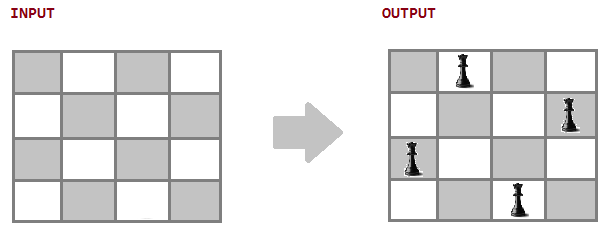

In this question you can consider the *4-queens problem* where each queen is associated with a row and can be assigned to any column in the row. Therefore the domains of each variable can be considered as which column you put the queen.

Define this problem as a CSP, and solve it using the `constraint` package.

In [209]:
fq = Problem()

domain = [0,1,2,3]
fq.addVariables(["r0", "r1", "r2", "r3"], domain)

In [210]:
#######

fq.addConstraint(AllDifferentConstraint(), ["r0","r1","r2","r3"])
fq.addConstraint(lambda x,y : abs(x-y) != 1, ("r0","r1"))
fq.addConstraint(lambda x,y : abs(x-y) != 2, ("r0","r2"))
fq.addConstraint(lambda x,y : abs(x-y) != 3, ("r0","r3"))
fq.addConstraint(lambda x,y : abs(x-y) != 1, ("r1","r2"))
fq.addConstraint(lambda x,y : abs(x-y) != 2, ("r1","r3"))
fq.addConstraint(lambda x,y : abs(x-y) != 1, ("r2","r3"))
# Define your constraints here
#######

In [211]:
fq.getSolutions()

[{'r0': 2, 'r1': 0, 'r2': 3, 'r3': 1}, {'r0': 1, 'r1': 3, 'r2': 0, 'r3': 2}]

## 4-Queens Problem as a Logical Problem (40)

In this part you are expected solve 4-Queens problem using propositional logic and the model checking approach. Please use the `logic.py` module encolsed with the homework. This is the same module that we discussed in the class. Below we export `logic.py` module. Note that the `logic.py` need to be at the same folder as this notebook.  

In [212]:
from logic import *

In this question, we will have a propositional symbol $q_{ij}$ (`qij`) for each possible placement of queen on row $i$ and column $j$. $q_{ij}$ is $true$ when there is a queen on row $i$ and column $j$. For example $q_{02}$ (`q02`) is $true$ if we have a queen on the first row and third column. Note that the indexing starts at 0. We have 16 symbols.

In [213]:
# We define a symbol qij that is true when there is queen in row i and column j
symbols = []

knowledge = And()

for row in range(4):
    for col in range(4):
        symbols.append(Symbol(f"q{row}{col}"))



Next, you will add statements regarding there will exactly one queen on each row, and exactly one queen on each column, and queens must not attack each other diagnoally to your knowledge base. You probably need to define these using `for` loops as there will be numerous sentences. I recommend checking the examples shown in the class.

In [214]:
# Exactly one queen in row i            
for row in range(4):
    knowledge.add(Or(
    Symbol(f"q{row}0"),
    Symbol(f"q{row}1"),
    Symbol(f"q{row}2"),
    Symbol(f"q{row}3")
    ))
    for col1 in range(4):
        for col2 in range(4):
            if col1 != col2:
                knowledge.add(
                    Implication(Symbol(f"q{row}{col1}"), Not(Symbol(f"q{row}{col2}")))
                )    


In [215]:
# Exactly one queen in column j            
for column in range(4):
    knowledge.add(Or(
    Symbol(f"q0{column}"),
    Symbol(f"q1{column}"),
    Symbol(f"q2{column}"),
    Symbol(f"q3{column}"),
    ))
    for row1 in range(4):
        for row2 in range(4):
            if row1 != row2:
                knowledge.add(
                    Implication(Symbol(f"q{row1}{column}"), Not(Symbol(f"q{row2}{column}")))
                )    


In [216]:
# At most one queen in each diagonal
for symbol1 in symbols:
    for symbol2 in symbols:
        if symbol1 != symbol2:
            row1 = int(symbol1.formula()[1])
            column1 = int(symbol1.formula()[2])
            row2 = int(symbol2.formula()[1])
            column2 = int(symbol2.formula()[2])
            if abs(row1-row2) == abs(column1-column2):
                knowledge.add(
                    Implication(symbol1, Not(symbol2))
                )

Finally you apply model checking to see which symbols are true or are not false. 

In [217]:
def check_knowledge(knowledge):
    for symbol in symbols:
        if model_check(knowledge, symbol):
            print(f"{symbol}: YES")
        elif not model_check(knowledge, Not(symbol)):
            print(f"{symbol}: MAYBE")

In [218]:
check_knowledge(knowledge)

q01: MAYBE
q02: MAYBE
q10: MAYBE
q13: MAYBE
q20: MAYBE
q23: MAYBE
q31: MAYBE
q32: MAYBE


If you have correctly defined your knowledge base, this code should print

~~~~python
q01: MAYBE
q02: MAYBE
q10: MAYBE
q13: MAYBE
q20: MAYBE
q23: MAYBE
q31: MAYBE
q32: MAYBE
~~~~

In order to find a specific solution, we need to add the place of the knowledge base as well. 


In [219]:
knowledge.add(Symbol("q01"))
check_knowledge(knowledge)

q01: YES
q13: YES
q20: YES
q32: YES


If you have correctly defined your knowledge base you should see

~~~~
q01: YES
q13: YES
q20: YES
q32: YES
~~~~